In [9]:
# 导入专利可视化程序包及相关程序包
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from datetime import datetime
# 设置中文显示字体
plt.rcParams['font.sans-serif'] = ['SimHei']       # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示正负号

# 专利态势分析
所谓专利态势分析，即对某一行业或技术领域的专利总体状况进行分析，通常是针对专利数量进行统计分析。基本的专利数量统计分析包括：

* 申请趋势分析

* 技术构成分析

* 地域分布分析

* 申请人排名分析

## 申请趋势分析
申请趋势分析常见的分析对象：

* 申请量

* 授权量

* 有效量

* 发明人数量

* 申请人数量
  
申请趋势分析常用图表：

* 折线图

* 面积图

* 柱形图
  
其中，折线图和面积图侧重表示较长时间段内的数量变化趋势，而柱形图侧重表示在短时间段内的数量变化情况，并突出每一个时间段的具体数量值。

### 折线图
#### 标准折线图

标准折线图在专利分析中常用来表示某一对象（如国家、地区、申请人、技术领域等）的专利申请量、授权量、有效量、发明人数量、申请人数量等随时间的变化情况

In [2]:
data_211 = pd.read_csv('data/Fig2-1-1.csv', 
                       header=None,
                       parse_dates=[0]).rename(columns={0:'年份', 1: '申请量'})

In [3]:
data_211.head()

,年份,申请量
0,1964-01-01,1
1,1966-01-01,4
2,1967-01-01,22
3,1969-01-01,17
4,1970-01-01,69


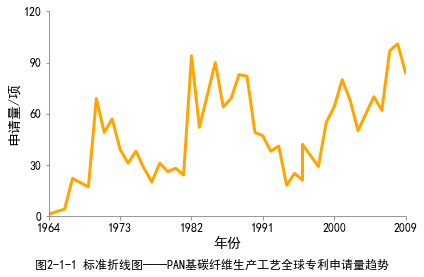

In [4]:
years_ticks = [1964, 1973, 1982, 1991, 2000, 2009]
amount_ticks = [0, 30, 60, 90, 120]

fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_211['年份'], data_211['申请量'],
        color='orange', lw=3)

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量/项', fontsize=14)
ax.set_xticks([datetime(year,1,1) for year in years_ticks], 
              [str(year) for year in years_ticks])
ax.set_yticks(amount_ticks)
ax.set_xlim([datetime(1964,1,1), datetime(2009,1,1)])
ax.set_ylim([0, 120])
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')
ax.tick_params(color='grey', labelsize=12)

fig.supxlabel('图2-1-1 标准折线图——PAN基碳纤维生产工艺全球专利申请量趋势', fontsize=12, y=0.05);


在标准折线图中，我们可以加入产业和技术信息，这样能够丰富折线图表达的内容，有助于理解该领域或申请人申请量变化的原因，便于得出可靠的结论。

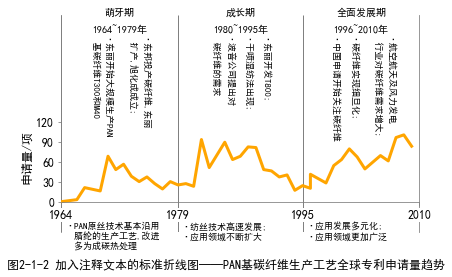

In [5]:
years_ticks = [1964, 1979, 1995, 2010]
amount_ticks = [0, 30, 60, 90, 120]
xlim = [datetime(1964,1,1), datetime(2010,1,1)]
ylim = [-45, 280]

fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_211['年份'], data_211['申请量'],
        color='orange', lw=3)

ax.set_ylabel('申请量/项', fontsize=12, y=0.35)
ax.set_xticks([datetime(year,1,1) for year in years_ticks], 
              [str(year) for year in years_ticks])
ax.set_yticks(amount_ticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines[['left', 'bottom', 'right']].set_color('grey')
ax.spines[['left', 'right']].set_zorder(1)      # 调整zorder以便突出刻度标签显示
ax.tick_params(color='grey', labelsize=12)

ax.spines['bottom'].set_position(('data', 0))
for label in ax.get_xticklabels():
    label.set_bbox(dict(fc='w', ec='w', pad=1)) # 设置刻度标签背景色以避免vlines对数字的干扰

ax.vlines([datetime(year,1,1) for year in years_ticks], *ylim, colors='grey',
          lw=1, zorder=1)       # 调整zorder以便突出刻度标签显示

annotate = [{'stage': '萌牙期',
        'period': '1964~1979年', 
        'event': ['·东邦投产碳纤维,东丽\n 扩产,旭化成成立;\n\n\n', 
                '·东丽开始大规模生产PAN\n 基碳纤维T300和M40'], 
        'effect': ['·PAN原丝技术基本沿用\n  腈纶的生产工艺,改进\n  多为成碳热处理']},
            {'stage': '成长期',
        'period': '1980~1995年',
        'event': ['·东丽开发T800;\n\n', 
                '·干喷湿纺法出现;\n\n', 
                '·波音公司提出对\n 碳纤维的需求'],
        'effect': ['·纺丝技术高速发展;\n', 
                '·应用领域不断扩大']},
            {'stage': '全面发展期',
        'period': '1996~2010年',
        'event': ['·航空航天及风力发电\n 行业对碳纤维需求增大;\n\n\n', 
                '·碳纤维实现细旦化;\n\n', 
                '·中国申请开始关注碳纤维'],
        'effect': ['·应用发展多元化;\n', 
                '·应用领域更加广泛']}]
ticks_x = [ax.transAxes.inverted().transform(ax.transData.transform((year,0))) 
           for year in ax.get_xticks()]
pos_x = [(a[0] + b[0]) / 2 for a, b in zip(ticks_x, ticks_x[1:])]
for i, v in enumerate(annotate):
    ax.text(pos_x[i], 1, annotate[i]['stage'], transform=ax.transAxes, ha='center')
    ax.text(pos_x[i], 0.92, annotate[i]['period'], transform=ax.transAxes, ha='center')
    ax.text(pos_x[i], 0.9, ''.join(annotate[i]['event']), transform=ax.transAxes, 
            ha='center', va='top', rotation=-90, multialignment='left', fontsize=9)
    ax.text(ticks_x[i][0]+0.01, 0.05, ''.join(annotate[i]['effect']), transform=ax.transAxes,
            multialignment='left', va='top', fontsize=9)

fig.supxlabel('图2-1-2 加入注释文本的标准折线图——PAN基碳纤维生产工艺全球专利申请量趋势', fontsize=12, y=0.05);
#fig.savefig('图2-1-2.png', dpi=300)

In [6]:
data_213 = pd.read_csv('data/Fig2-1-3.csv', 
                       header=None,
                       parse_dates=[0]).rename(columns={0:'年份', 1: '申请量'})
data_213.head()

,年份,申请量
0,2001-01-01,4
1,2002-01-01,4
2,2003-01-01,5
3,2004-01-01,19
4,2005-01-01,81


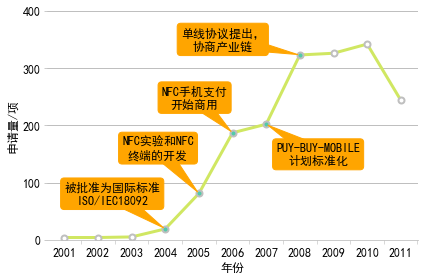

In [70]:
ylim = [0, 400]
amount_ticks = range(0, 401, 100)

fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_213['年份'], data_213['申请量'], color='#D0E762', lw=3)
for row in data_213.index:
    color = '#52CAA9' if (row > 2 and row < 8) else 'white'
    ax.plot(data_213.loc[row, '年份'], data_213.loc[row, '申请量'], 'o',
            markeredgecolor='#BFBFBF', markeredgewidth=2, markersize=6, 
            markerfacecolor=color)

ax.set_ylabel('申请量/项', fontsize=12)
ax.set_xlabel('年份', fontsize=12)

ax.set_ylim(ylim)
ax.set_yticks(amount_ticks)
ax.set_xticks(data_213['年份'])
# 将X轴刻度标签移至主刻度线中间，参考https://matplotlib.org/stable/gallery/ticks/centered_ticklabels.html
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  
ax.tick_params(axis='x', bottom=False)   # 隐藏主刻度
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=6)) # 显示辅刻度
ax.tick_params(axis='x', which='minor', length=4, color='#BFBFBF')

ax.spines[['left', 'top', 'right']].set_visible(False)
ax.grid(True, axis='y')
ax.spines['bottom'].set_color('#BFBFBF')
ax.tick_params(color='#BFBFBF', labelsize=12)

txt = ['被批准为国际标准\nISO/IEC18092',
        'NFC实验和NFC\n终端的开发',
        'NFC手机支付\n开始商用',
        'PUY-BUY-MOBILE\n计划标准化',
        '单线协议提出，\n协商产业链',]
# 绘制对话框气泡注释
def dlg_bubble(txt, axes, *, xy, xytext, ha, tail_width, fontsize):
    rect = mpatches.Rectangle((0,0), 1, 1)
    ann = axes.annotate(txt, xy=xy, fontsize=fontsize, xytext=xytext, 
                  textcoords='offset points', ha=ha, multialignment='center',
                  bbox=dict(boxstyle='round', fc='orange', ec='orange'),
                  arrowprops=dict(arrowstyle=f'wedge,tail_width={tail_width}', 
                                  fc='orange', ec='orange', shrinkA=0, patchA=rect))
    ann.get_bbox_patch().get_bbox().

dlg_bubble(txt[0], ax, xy=(data_213.iloc[3,0], data_213.iloc[3,1]), 
           xytext=(-5,25), ha='right', tail_width=1.5, fontsize=12)
dlg_bubble(txt[1], ax, xy=(data_213.iloc[4,0], data_213.iloc[4,1]),
           xytext=(-5,35), ha='right', tail_width=1.5, fontsize=12)
dlg_bubble(txt[2], ax, xy=(data_213.iloc[5,0], data_213.iloc[5,1]),
           xytext=(-5,25), ha='right', tail_width=1.5, fontsize=12)
dlg_bubble(txt[3], ax, xy=(data_213.iloc[6,0], data_213.iloc[6,1]),
           xytext=(10,-40), ha='left', tail_width=1.5, fontsize=12)
dlg_bubble(txt[4], ax, xy=(data_213.iloc[7,0], data_213.iloc[7,1]),
           xytext=(-35,5), ha='right', tail_width=1.5, fontsize=12)